In [1]:
using ThreeBodyProblem
using DifferentialEquations
using Plots

In [2]:
μ₁ = 398600 # {km³/s²} gravitational parameter of Earth
μ₂ = 4902   # {km³/s²} gravitational parameter of the Moon
d = 384400  # {km} average distance between Earth and the Moon
p = [μ₁, μ₂, d];

In [3]:
Lpts = findLpts(p)
L4 = Lpts[4]
L1 = findL1(p)

3-element Array{Float64,1}:
 321713.8570517506
      0.0
      0.0

In [5]:
R₁,R₂ = findR1R2(p)
ωₛ = sqrt((μ₁ + μ₂)/d^3)

2.665310298373478e-6

In [6]:
N = 100
X = range(0,1.2*d,length=N)
Y = range(-d/2,d/2,length=N)

-192200.0:3882.8282828282827:192200.0

In [7]:
f(x,y) = begin
    -(x^2 + y^2)*ωₛ^2/2 - μ₁/sqrt((x+R₁)^2 + y^2) - μ₂/sqrt((x-R₂)^2 + y^2)
    # rv = [x; y; 0; 0; 0; 0]
    # findUeff(rv,p)
end

f (generic function with 1 method)

In [8]:
contour(X,Y,f,levels=200,fill=true)

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [9]:
Rₑ = 6378.0 # {km} radius of the Earth
Rₘ = 1738.0 # {km} radius of the Moon
h = 200.0   # {km} altitude of parking orbit

200.0

In [10]:
vᵢ = 10.92367104    # {km/s} injection velocity in rotating frame
ϕ = 47.70061087     # {°}

47.70061087

In [11]:
r₀ = [-R₁ - (Rₑ + 200)*cosd(ϕ); -(Rₑ + 200)*sind(ϕ); 0]
v₀ = vᵢ*[sind(ϕ); -cosd(ϕ); 0];
rv₀ = [r₀;v₀]

6-element Array{Float64,1}:
 -9096.961145507787
 -4865.340542620438
     0.0
     8.07956515432666
    -7.3516811619605145
     0.0

In [12]:
tspan = (0.,86400*6.) # {sec} 6 day span

(0.0, 518400.0)

In [13]:
prob = ODEProblem(CR3BPdynamics!,rv₀,tspan,p)
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 110-element Array{Float64,1}:
      0.0
      0.19809069556749268
      2.1789976512424194
     21.988067207991683
     92.77526958590991
    196.70519159425237
    313.66458981957004
    448.238947843345
    597.2049863320312
    763.4100058220295
    948.2712928148212
   1155.8110488705502
   1390.210416340324
      ⋮
 502204.5219340589
 502776.4665831383
 503450.8619460844
 504247.1790354862
 505193.9752620015
 506321.7477130303
 507669.10994072864
 509281.40815959574
 511214.109047643
 513532.78108291596
 516292.6271665352
 518400.0
u: 110-element Array{Array{Float64,1},1}:
 [-9096.961145507787, -4865.340542620438, 0.0, 8.07956515432666, -7.3516811619605145, 0.0]
 [-9095.360537973598, -4866.796709407592, 0.0, 8.080785257845982, -7.350339812191332, 0.0]
 [-9079.341186525837, -4881.34374796782, 0.0, 8.092961893716812, -7.336904230035766, 0.0]
 [-8917.838222786235, -5025.335334766077, 0.0, 8.212236092081602, -7

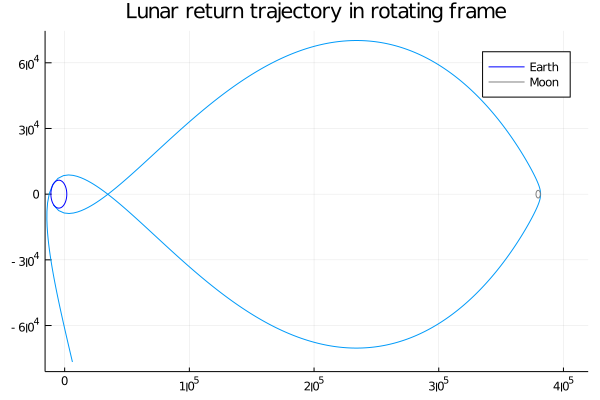

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [14]:
plot(sol,vars=(1,2),title="Lunar return trajectory in rotating frame",label="")
plot_circle(Rₑ,[-R₁;0],color="blue",label="Earth")
plot_circle(Rₘ,[R₂;0],color="gray",label="Moon")

In [15]:
for i = 1:length(sol)
    S2I!(sol.u[i],sol.t[i],p)
end

UndefVarError: UndefVarError: S2I! not defined

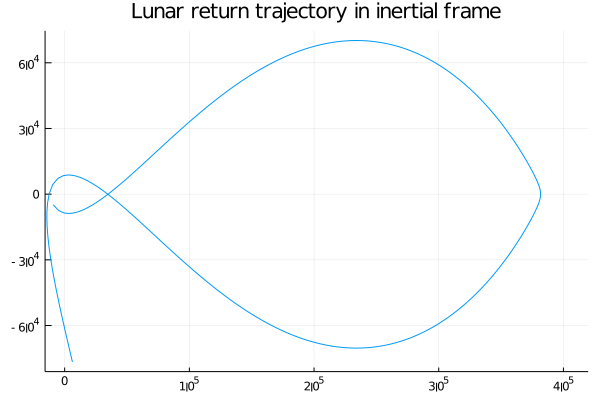

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [16]:
plot(sol,vars=(1,2),title="Lunar return trajectory in inertial frame",label="")
# plot_circle(Rₑ,[-R₁*cos(ωₛ*tₚ);],color="blue",label="Earth")
# plot_circle(Rₘ,[R₂;0],color="gray",label="Moon")

In [17]:
S2I!(rv₀,0,p)
prob = ODEProblem(CR3BPinert!,rv₀,tspan,p)
sol = solve(prob,reltol=1e-6)
plot(sol,vars=(1,2),title="Lunar return trajectory in inertial frame",label="")
# plot_circle(Rₑ,[-R₁*cos(ωₛ*tₚ);],color="blue",label="Earth")
# plot_circle(Rₘ,[R₂;0],color="gray",label="Moon")

UndefVarError: UndefVarError: S2I! not defined